# Assignment 04 Due: Thursday 9/26

## Problem 1

For this assignment we will look at the normal distribution function's PDF and how we can use it to calculate probabilities. Import the numpy, scipy.stats, scipy.integrate, and matplotlib.pyplot libraries.

In [4]:
import numpy as np
from scipy import integrate
from scipy.integrate import odeint
from scipy.integrate import quad
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

# Problem 2

Use the scipy library to plot the pdf of a normal distribution that has a mean of 10, sigma of 0.5 and spans the range 5 to 15.
> scipy.stats.norm.pdf(x, loc, scale)

function to plot the pdf of the normal distribution. Here x should be a numpy array of 1000 points from 5 to 15. The prameter loc and scale that the function takes as input is the mean and sigma values of the normal distribution. You plot should look like what is shown below. 

<div>
<img src="attachment:P2.png" width="400"/>
</div>

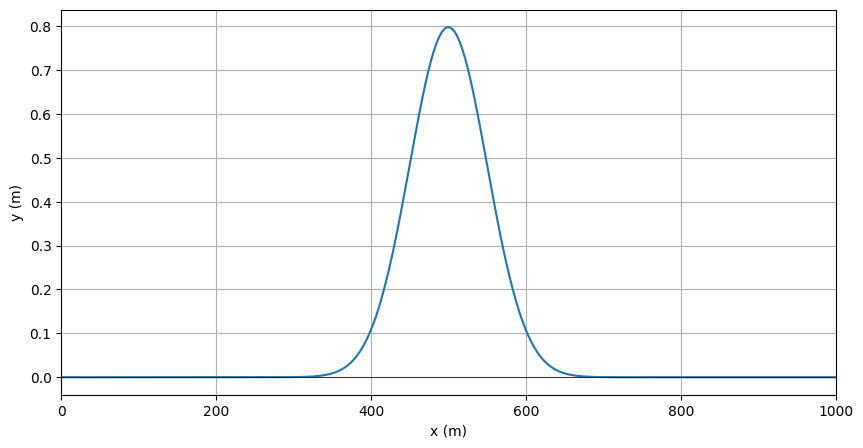

In [16]:
x = np.linspace(5,15,1000)
st = scipy.stats.norm.pdf(x,10,0.5)
plt.figure(figsize=(10, 5))
plt.plot(st)
plt.title('')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()
plt.xlim(0, 1000)
#plt.ylim(0, max(st) + 10)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)


# Problem 3

We can calculate the probability that our value lies in a particular range. For the normal distribution the number of sigmas that you are away from the mean are directly related to the probability of finding our value in that range. 

For example if our value x lies in the range $\mu - \sigma \le x \le \mu +\sigma$, where $\mu$ is the mean value of the distribution (10 in this assignment), then the probability of our value x lying in that range is $68.2\%$. 

The probability that x lies in the range $\mu - 2\sigma \le x \le \mu + 2\sigma$ is $95.4\%$. As our range becomes wider, so does the probability that it contains our value x. This can be seen from the plot below (taken from [wikipedia](https://en.wikipedia.org/wiki/Normal_distribution#/media/File:Standard_deviation_diagram_micro.svg)). 

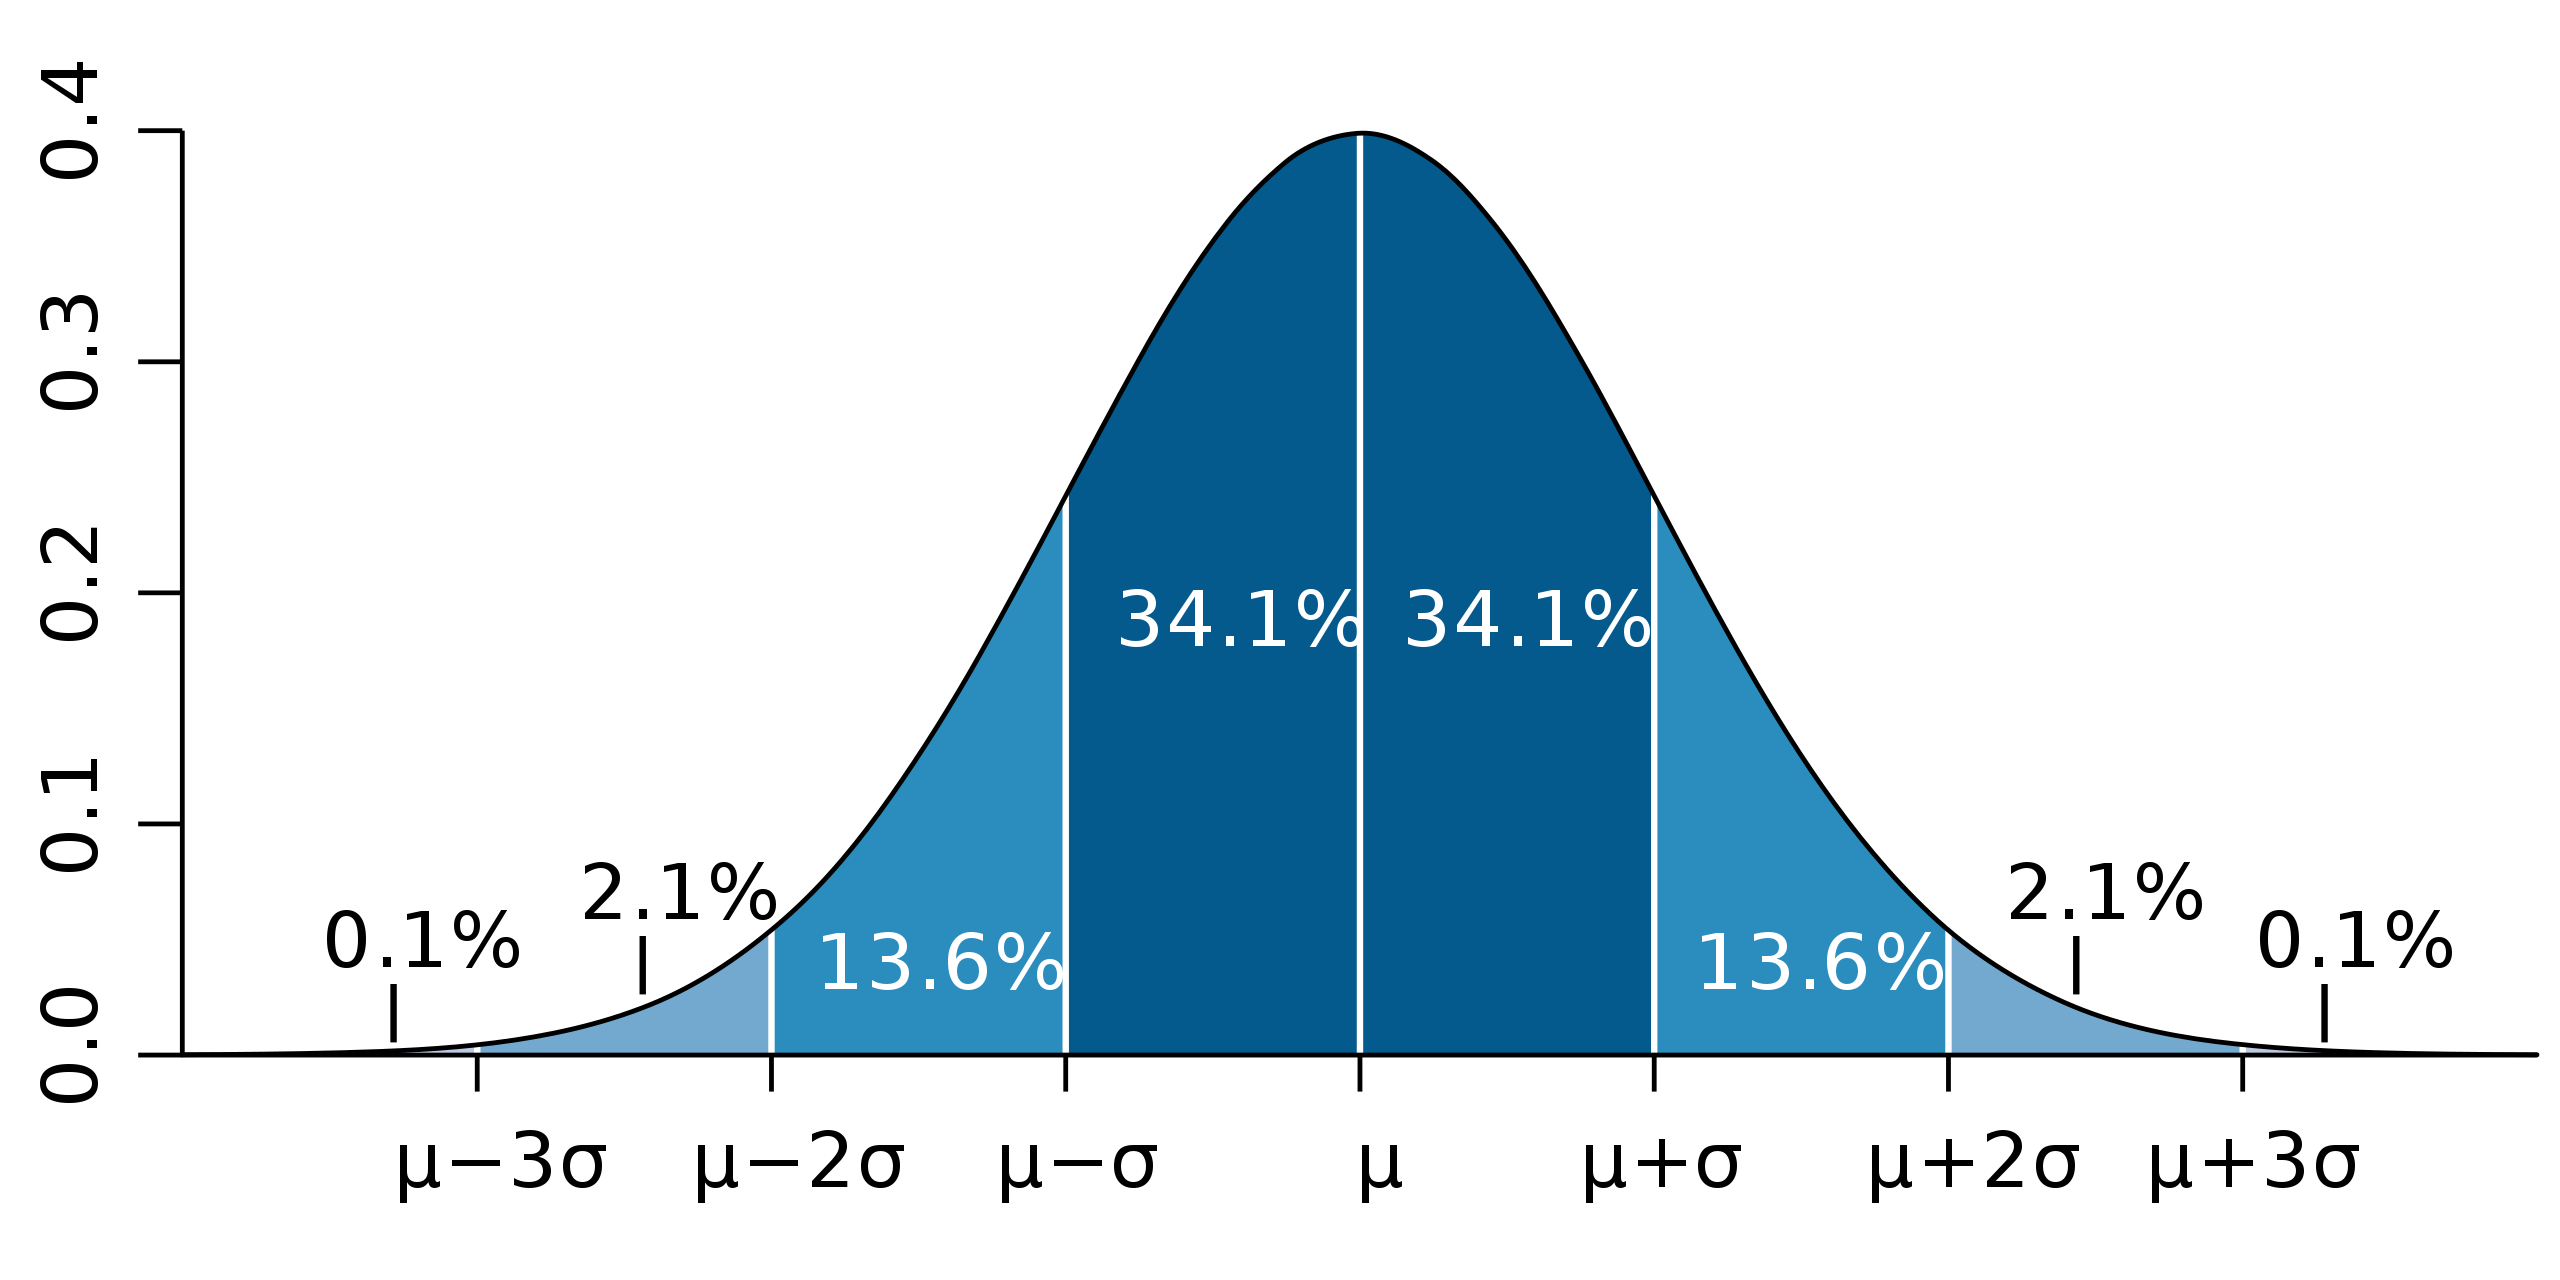

We will first use the cumulative distribution function (CDF) from scipy to verify these probabilities.

Using
>scipy.stats.norm.cdf(x,loc,scale)

where the inputs are:
* x tells the cdf to add all values upto and below x
* loc is the mean value of the normal distribution
* scale is the sigma of the normal distribution

Use the scipy cdf function to evaluate the probability in the following ranges:
* mean $-\sigma < x <$ mean $+ \sigma$
* mean $-2\sigma < x <$ mean $+ 2\sigma$
* mean $-3\sigma < x <$ mean $+ 3\sigma$

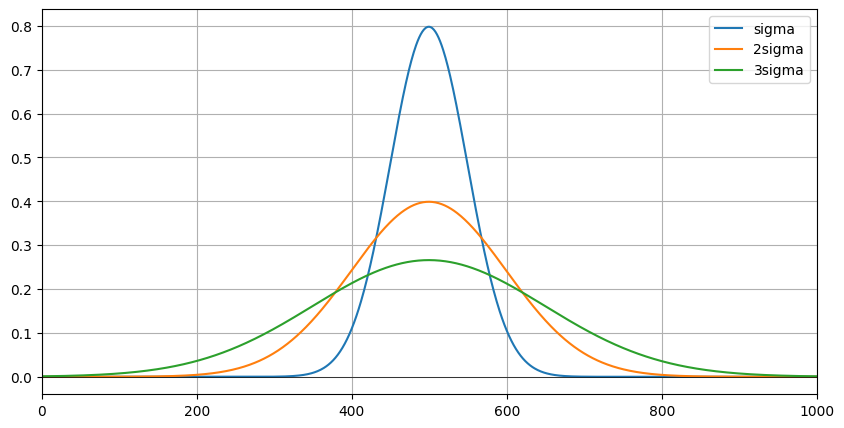

In [83]:
x = np.linspace(5,15,1000)
mean = 10
sigma = 0.5
st = scipy.stats.norm.pdf(x,mean,sigma)
st2 = scipy.stats.norm.pdf(x,mean,2*sigma)
st3 = scipy.stats.norm.pdf(x,mean,3*sigma)



plt.figure(figsize=(10, 5))
plt.plot(st,label = 'sigma')
plt.plot(st2,label = '2sigma')
plt.plot(st3,label = '3sigma')
plt.title('')
plt.grid()
plt.xlim(0, 1000)
#plt.ylim(0, max(st) + 10)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()


# Problem 4

Define a function that takes an array x, and numbers a and b, which correspond to the mean and sigma of a normal distibution, and returns the evaluation of

$$\frac{1}{b\sqrt{2\pi}}\exp\left[{-\frac{1}{2}\left(\frac{(x-a)}{b}\right)^2}\right] $$

In [52]:
def normaldist(x,a,b):
    mean = a
    sigma = b
    dis = 1/(b*np.sqrt(2 * np.pi)) * np.exp(-1/2 * ((x - a)/b)**2)
    return dis

# Problem 5

Make a numpy array called xx that contains 1000 points over the range 5 to 15. Use your gaus function from the previous problem that takes the arguments xx, mean, and sigma. Here the mean = 10 and sigma = 0.5, same as in Problem 2. Call this array yy.

Then plot yy vs. xx as markers, and compare it to the PDF curve you found in Problem 2 by plotting both on the same canvas. See below for what you plot should look like.

<div>
<img src="attachment:P5.png" width="400"/>
</div>


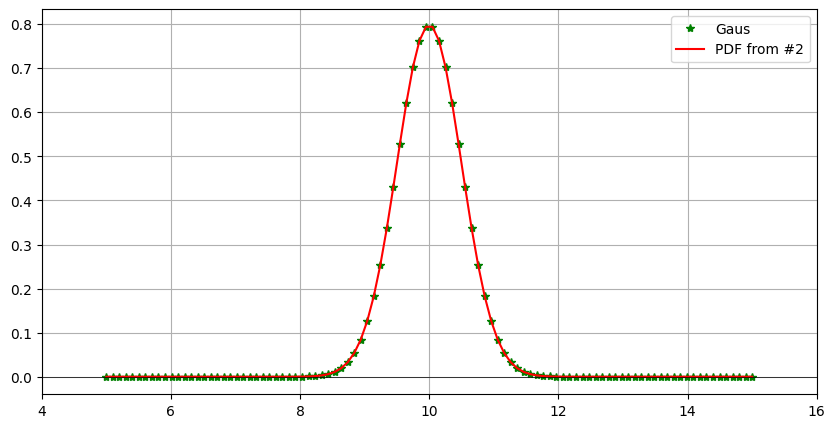

In [70]:
xx = np.linspace(5,15,100) #I made it 100 instead of 1000, as it was all smushing together. the 100 looks more like your graph
yy = normaldist(xx,mean,sigma)
x = np.linspace(5,15,100)
num2 = scipy.stats.norm.pdf(x,mean,sigma)

plt.figure(figsize=(10, 5))
plt.plot(xx,yy,'*g',label = 'Gaus')
plt.plot(xx,num2,'r',label = 'PDF from #2')
plt.title('')
plt.grid()
plt.xlim(4, 16)
#plt.ylim(0,1)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()

# Problem 6

Because the CDF is just the integral of the PDF, we should be able to integrate our gaus function over a particular range and obtain the same probabilities we found in Problem 3.

Use the 
>scipy.integrate.quad(function, a, b, args=(mean, sigma))

where function should be our gaus function, a is the lower limit of our integral, b is the upper limit of the integral, and args are the arguments taken by our gaus function. In our case this is the mean = 10, and sigma = 0.5. This will give you an array with two elements. The first is the integral value (e.g. our probability) and the second is the numerical error of the integration. Remember numerical integrations are approximations so there is an error associated with the calculation.

Using scipy.integrate.quad integrate your gaus function of the three ranges specified in Problem 3.

**Do you end up with the same probabilities?**

In [84]:
pr6 = scipy.integrate.quad(normaldist,5,15,args=(mean,sigma))
pr62 = scipy.integrate.quad(normaldist,5,15,args=(mean,2*sigma))
pr63 = scipy.integrate.quad(normaldist,5,15,args=(mean,3*sigma))
print(pr6)
print(st) #DONT UNDERSTAND, ONE IS A SET OF 2, THE OTHER A SET OF 100
print(pr62)
print(pr63)

#plt.figure(figsize=(10, 5))
#plt.plot(pr6,label = 'sigma')
#plt.plot(pr62,label = '2sigma')
#plt.plot(pr63,label = '3sigma')
#plt.title('')
#plt.grid()
##plt.xlim(0, 16)
##plt.ylim(0, max(st) + 10)
#plt.axhline(0, color='black', lw=0.5)
#plt.axvline(0, color='black', lw=0.5)
#plt.legend()

(1.0, 8.671031587518217e-10)
[1.53891973e-22 1.87964042e-22 2.29487756e-22 2.80072325e-22
 3.41669970e-22 4.16648052e-22 5.07876170e-22 6.18831270e-22
 7.53724444e-22 9.17653834e-22 1.11678893e-21 1.35859263e-21
 1.65208862e-21 2.00818334e-21 2.44005330e-21 2.96361103e-21
 3.59806518e-21 4.36659369e-21 5.29715248e-21 6.42344634e-21
 7.78609433e-21 9.43402787e-21 1.14261674e-20 1.38334322e-20
 1.67411483e-20 2.02519327e-20 2.44891460e-20 2.96010244e-20
 3.57656214e-20 4.31967172e-20 5.21508805e-20 6.29359051e-20
 7.59208835e-20 9.15482314e-20 1.10348034e-19 1.32955152e-19
 1.60129623e-19 1.92780953e-19 2.31997070e-19 2.79078776e-19
 3.35580761e-19 4.03360377e-19 4.84635639e-19 5.82054158e-19
 6.98775031e-19 8.38566086e-19 1.00591931e-18 1.20618780e-18
 1.44574816e-18 1.73219309e-18 2.07455947e-18 2.48359863e-18
 2.97209624e-18 3.55525092e-18 4.25112214e-18 5.08115966e-18
 6.07082948e-18 7.25035317e-18 8.65558097e-18 1.03290224e-17
 1.23210622e-17 1.46913943e-17 1.75107123e-17 2.08627015